In [1]:
# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)
# path = "drive/My Drive/Deep Learning Course/project_301558086_305143315/GAN Barcode Reading/"
path = ""
barcode_f = "Random Python Barcodes"

# Create Barcode Images

In [4]:
import numpy as np
import barcode
from barcode.writer import ImageWriter

samples = 5000
random_bars = np.asarray(np.random.random_sample(samples), dtype=str)


i=0
for bar in random_bars:
  # print(i[2:14])
  ean = barcode.get('ean13', bar[2:14], writer=ImageWriter())
  code = str(ean.get_fullcode())
  filename = ean.save(path+barcode_f+ '/' + code)    
  # print(code)
  i += 1
  if i % 250 == 0:
      print("%d Barcodes generated" % i)
print("Files in train_files: %d" % len(random_bars))

250 Barcodes generated


500 Barcodes generated


750 Barcodes generated


1000 Barcodes generated


1250 Barcodes generated


1500 Barcodes generated


1750 Barcodes generated


2000 Barcodes generated


2250 Barcodes generated


2500 Barcodes generated


2750 Barcodes generated


3000 Barcodes generated


3250 Barcodes generated


3500 Barcodes generated


3750 Barcodes generated


4000 Barcodes generated


4250 Barcodes generated


4500 Barcodes generated


4750 Barcodes generated


5000 Barcodes generated
Files in train_files: 5000


# Save Images to Numpy

In [9]:
import os
import numpy as np
from skimage import io
from skimage.transform import rotate, rescale
from skimage.util import random_noise
from skimage.filters import gaussian
# from skimage.viewer import ImageViewer
import matplotlib.pyplot as plt

def canvas(c_x, n):
    row,col = c_x.shape
    if n == 0:
      n = int(np.linalg.norm((row,col)))
    c_y = np.ones((n, n),dtype=c_x.dtype)
    row_pad = int((n - row)/2)
    col_pad = int((n - col)/2)
    c_y[row_pad:-row_pad, col_pad:-col_pad] = c_x
    return c_y

i = 0
barcode_set = []
y_train = []

# barcode images
for _file in os.listdir(path+barcode_f):
    img = io.imread(path+barcode_f + "/" + _file, as_gray = True)  # this is a skimage image - ndarray
    img = img[0:200, 60:460]
    
    img = rescale(img, 0.4,  order=0)

    img = canvas(img, 180) # all images are square

    flr_img = img[:, ::-1]
    b_img = gaussian(img, sigma=0.7)
    b_flr_img = gaussian(flr_img, sigma=0.7)
    barcode_set.append(img)
    barcode_set.append(b_img)
    barcode_set.append(flr_img)
    barcode_set.append(b_flr_img)
    num_angles = 4
    angles = np.random.randint(-175, high=176, size=num_angles)
    for a in angles:      
      r_img = rotate(img, a, resize=False, mode='constant', cval=1)
      barcode_set.append(r_img)

    angles = np.random.randint(-175, high=176, size=num_angles)
    for a in angles:
      r_b_img = rotate(b_img, a, resize=False, mode='constant', cval=1)
      barcode_set.append(r_b_img)
    
    # # plot image larger
    # plt.figure(figsize=(10, 10))
    # plt.grid(b=False)
    # plt.imshow(img)
    # plt.gray()
    # plt.show()  
    
    # io.imshow(r_b_img, aspect='auto')
    # io.show()  
    # print(r_b_img.shape)
    
    label_in_file = _file.find(".")
    label = _file[0:label_in_file] 
    # print(label)
    y_train += [label]*(4+num_angles*2)
#     print([label]*(3+num_angles*2))
    i += 1
    if i % 250 == 0:
        print("%d Barcode images to array" % i)

print("All Barcode images to array!")

# skimage values are already normalization [0,1]

barcode_set = np.array(barcode_set, dtype='float32')
barcode_set = np.expand_dims(barcode_set, -1)
print(barcode_set.shape)

y_train = np.array(y_train, dtype='float32')
y_train = np.expand_dims(y_train, -1)
print(y_train.shape)

250 Barcode images to array


500 Barcode images to array


750 Barcode images to array


1000 Barcode images to array


1250 Barcode images to array


1500 Barcode images to array


1750 Barcode images to array


2000 Barcode images to array


2250 Barcode images to array


2500 Barcode images to array


2750 Barcode images to array


3000 Barcode images to array


3250 Barcode images to array


3500 Barcode images to array


3750 Barcode images to array


4000 Barcode images to array


4250 Barcode images to array


4500 Barcode images to array


4750 Barcode images to array


5000 Barcode images to array
All Barcode images to array!


(60000, 180, 180, 1)
(60000, 1)


In [10]:
from sklearn.model_selection import train_test_split
import h5py

# Auto Encoder Splitting 
# dataset - X_train, x_test
# barcode_set - B_train, b_test
X_train, x_test, B_train, b_test = train_test_split(barcode_set, y_train, test_size=0.1, random_state=33)
print(X_train.shape, x_test.shape, B_train.shape, b_test.shape)

(54000, 180, 180, 1) (6000, 180, 180, 1) (54000, 1) (6000, 1)


In [18]:
print(X_train.shape, x_test.shape, B_train.shape, b_test.shape)

(54000, 180, 180, 1) (6000, 180, 180, 1) (54000, 1) (6000, 1)


In [16]:
print("Creating hdf5 file")
hf = h5py.File('X_train.h5', 'w')
hf.create_dataset('X_train', X_train.shape, data=X_train, chunks=(1, 180, 180, 1), compression="gzip")
hf.close()
print("Finished!")

Creating hdf5 file
Finished!


In [14]:
print("Creating hdf5 file")
hf = h5py.File('x_test.h5', 'w')
hf.create_dataset('x_test', x_test.shape, data=x_test, chunks=(1, 180, 180, 1), compression="gzip")
hf.close()
print("Finished!")


Creating hdf5 file


Finished!


In [12]:
print("Creating hdf5 file")
hf = h5py.File('B_train.h5', 'w')
hf.create_dataset('B_train', B_train.shape, data=B_train, compression="gzip")
hf.close()
print("Finished!")


Creating hdf5 file
Finished!


In [11]:
print("Creating hdf5 file")
hf = h5py.File('b_test.h5', 'w')
hf.create_dataset('b_test', b_test.shape, data=b_test, compression="gzip")
hf.close()
print("Finished!")

Creating hdf5 file
Finished!


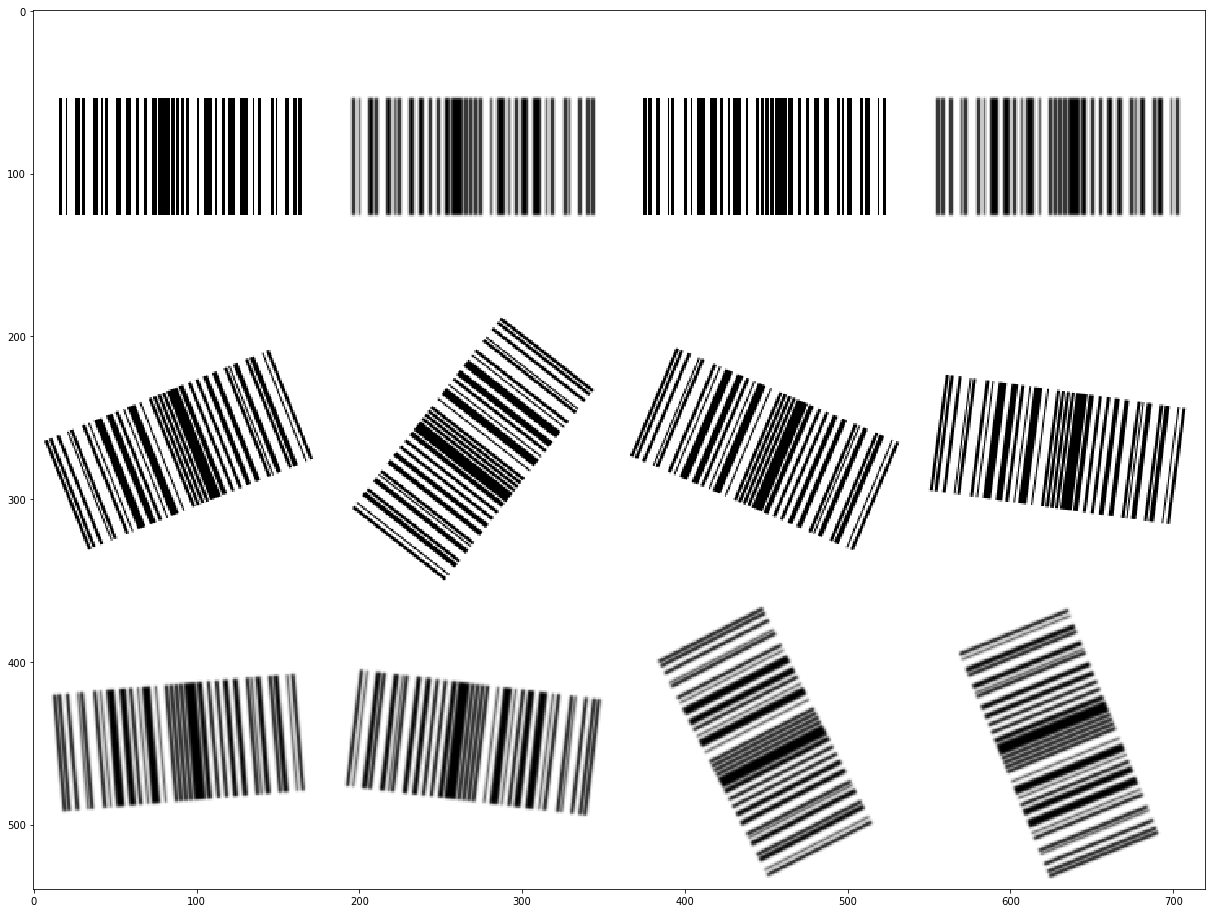

In [17]:
import matplotlib.pyplot as plt
m = 3
n = 4
_, img_rows, img_cols, _ = barcode_set.shape
figure = np.zeros((img_rows * m, img_cols * n))
num = 0
for i in range(m):
    for j in range(n):  
        digit = barcode_set[num, :, :, 0]
        d_x = i * img_rows
        d_y = j * img_cols
        if num < 12:
            figure[d_x:d_x + img_rows, d_y:d_y + img_cols] = digit[:, :]
            num += 1

fc = 7
plt.figure(figsize=(m*fc, n*fc))
plt.grid(b=False)
plt.imshow(figure)
plt.gray()
plt.show()